In [34]:
df=pd.read_csv('USA_Housing.csv’)

SyntaxError: EOL while scanning string literal (<ipython-input-34-6dfc643af005>, line 1)

In [35]:
import pandas as pd
df=pd.read_csv("USA_Housing.csv")
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.45857,5.682861,7.009188,4.09,23086.80050,1.059034e+06
1,79248.64245,6.002900,6.730821,3.09,40173.07217,1.505891e+06
2,61287.06718,5.865890,8.512727,5.13,36882.15940,1.058988e+06
3,63345.24005,7.188236,5.586729,3.26,34310.24283,1.260617e+06
4,59982.19723,5.040555,7.839388,4.23,26354.10947,6.309435e+05


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


In [37]:
#!pip install missingno
import matplotlib
matplotlib.missingno.bar(df)

AttributeError: module 'matplotlib' has no attribute 'missingno'

<AxesSubplot:>

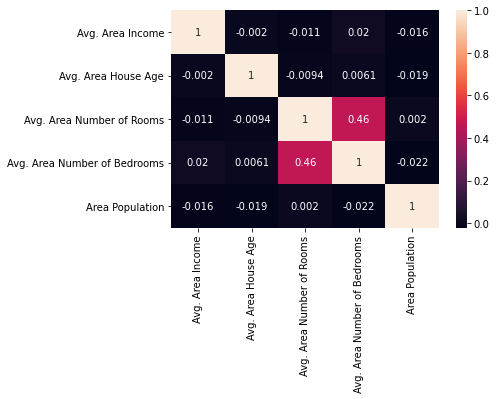

In [38]:
import seaborn as sns
sns.heatmap(df.iloc[:,0:5].corr(),annot=True)

In [39]:
import numpy as np
X=df.iloc[:,0:5]
Y=df.iloc[:,5]
Y=np.array(Y)
Y=Y.reshape(-1,1)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
X_scaled= np.insert(X_scaled, 0, values=1, axis=1)

In [65]:
print(len(X_scaled))

5000


In [41]:
X_scaled

array([[ 1.        ,  1.02865969, -0.29692705,  0.02127433,  0.08806222,
        -1.31759867],
       [ 1.        ,  1.00080775,  0.02590164, -0.25550611, -0.72230146,
         0.40399945],
       [ 1.        , -0.68462915, -0.11230283,  1.5162435 ,  0.93084045,
         0.07240989],
       ...,
       [ 1.        , -0.48723454,  1.28447022, -2.17026949, -1.50025059,
        -0.29193658],
       [ 1.        , -0.05459152, -0.44669439,  0.14154061,  1.18205319,
         0.65111608],
       [ 1.        , -0.28831272,  0.01521477, -0.19434166,  0.07185495,
         1.04162464]])

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [43]:
n,k=X_train.shape
I=np.identity(k)
lamba=0.001
A=X_train.T.dot(X_train)
B=A+lamba*I
C=np.linalg.inv(B)
D=C.dot(X_train.T)
beta=D.dot(y_train)

In [44]:
y_predict=X_test.dot(beta)
print(y_predict)

[[1308535.74658553]
 [1237122.35082543]
 [1243835.23921935]
 ...
 [1457119.34964292]
 [1483428.51890416]
 [1047510.27589634]]


In [45]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print("mse: ")
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print("rms: ")
print(rms_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print("R2 score: ")
print(1-sum_square_error/total_variance)

mse: 
10068424365.066883
rms: 
100341.53858231836
R2 score: 
0.9146818345067763


In [46]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
from sklearn import metrics
print(metrics.mean_squared_error(pred,y_test))
print(metrics.mean_absolute_error(pred,y_test))
print(np.sqrt(metrics.mean_squared_error(pred,y_test)))
print(metrics.r2_score(y_test, pred))

10068422549.495705
81135.56608241772
100341.52953536091
0.9146818498916267


In [47]:
beta


array([[1231278.28404984],
       [ 230464.45918853],
       [ 164159.15066291],
       [ 120514.66685039],
       [   2913.64762867],
       [ 151019.30962278]])

In [70]:
def k_fold(k):
    list_sz=len(Y)
    print(list_sz)
    block=list_sz/k
    total_data=[]
    y_total=[]
    temp_data=[]
    t=0
    for i in range(k):
        a=0
        temp_X=[]
        temp_Y=[]
        while a<block:
            temp_X.append(X_scaled[t])
            temp_Y.append(Y[t])
            t=t+1
            a=a+1
        t=t-1
        total_data.append(temp_X)
        y_total.append(temp_Y)
    
    #print(total_data.shape)
    #print(y_total.shape)
    validation_accu=[]
    
    initial_r_score=-10000000.0
    beta_final=[]
    beta_final=np.asarray(beta_final)
    for i in range(k):
        new_list_3=[]
        y_3=[]
        test_y=[]
        test_x=[]
        for j in range(k):
            if i!=j:
                for p in range(len(total_data[j])):
                    new_list_3.append(total_data[j][p])
                    y_3.append(y_total[j][p])
            else:
                for p in range(len(total_data[j])):
                    test_x.append(total_data[j][p])
                    test_y.append(y_total[j][p])
        
        test_y= np.asarray(test_y)
        test_x= np.asarray(test_x)
        new_list_3= np.asarray(new_list_3)
        y_3= np.asarray(y_3)
        
        #validation_accu.append(model_run(new_list_3,y_3,test_x,test_y))
        
        n,K=new_list_3.shape
        I=np.identity(K)
        lamba=0.001
        A=new_list_3.T.dot(new_list_3)
        B=A+lamba*I
        C=np.linalg.inv(B)
        D=C.dot(new_list_3.T)
        beta=D.dot(y_3)
        
        y_predict=test_x.dot(beta)
        
        error=test_y-y_predict
        square_error=np.power(error,2)
        sum_square_error=np.sum(square_error)
        mean_square_error=sum_square_error/len(y_predict)
        rms_error=np.sqrt(mean_square_error)
        y_mean=np.mean(test_y)
        total_variance=np.sum((test_y-y_mean)**2)
        print("R2 my score: ")
        cur_r_sc=1-sum_square_error/total_variance
        print(1-sum_square_error/total_variance)
        
        if cur_r_sc > initial_r_score:
            beta_final=beta
                            
        #print(validation_accu)
        
    return beta_final


In [71]:
new_beta= k_fold(5)

5000
R2 my score: 
0.91759170690439
R2 my score: 
0.9204127123357685
R2 my score: 
0.9148602972195872
R2 my score: 
0.9210685665502336
R2 my score: 
0.9136335956093927


In [72]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.3, random_state=42)

In [73]:
y_predict=X_test.dot(new_beta)
print(y_predict)

[[1308931.339646  ]
 [1238415.16841335]
 [1248116.9283523 ]
 ...
 [1459428.96572173]
 [1481005.06910866]
 [1053538.38167095]]


In [74]:
error=y_test-y_predict
square_error=np.power(error,2)
sum_square_error=np.sum(square_error)
mean_square_error=sum_square_error/len(y_predict)
print("mse: ")
print(mean_square_error)
rms_error=np.sqrt(mean_square_error)
print("rms: ")
print(rms_error)
y_mean=np.mean(y_test)
total_variance=np.sum((y_test-y_mean)**2)
print("R2 score: ")
print(1-sum_square_error/total_variance)

mse: 
10056241952.064686
rms: 
100280.81547367216
R2 score: 
0.9147850662629023
